# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


Load file 'diabetes.csv' from a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df

In [74]:
import pandas as pd
pima_df = pd.read_csv('diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [75]:
pima_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
48,7,103,66,32,0,39.1,0.344,31,1
703,2,129,0,0,0,38.5,0.304,41,0
161,7,102,74,40,105,37.2,0.204,45,0
536,0,105,90,0,0,29.6,0.197,46,0
422,0,102,64,46,78,40.6,0.496,21,0
693,7,129,68,49,125,38.5,0.439,43,1
187,1,128,98,41,58,32.0,1.321,33,1
340,1,130,70,13,105,25.9,0.472,22,0
289,5,108,72,43,75,36.1,0.263,33,0
209,7,184,84,33,0,35.5,0.355,41,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [78]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [79]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [80]:
import numpy as np
chg_data= pima_df[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']].median()
chg_data
pima_df.replace(0, chg_data, inplace = True)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [81]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

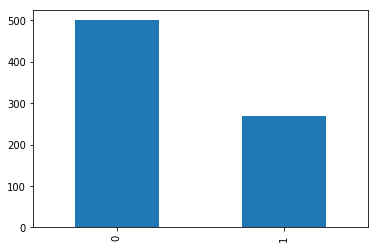

In [39]:
from matplotlib import pyplot as plt
pima_df["Outcome"].value_counts().plot(kind='bar')
plt.show()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

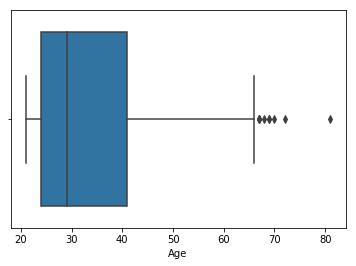

In [43]:
import seaborn as sns
#age analysis
sns.boxplot(x=pima_df["Age"])

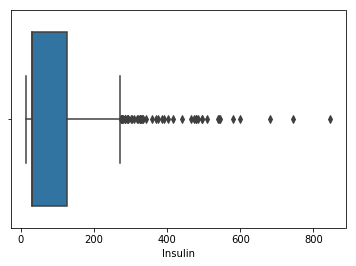

In [44]:
#insulin
sns.boxplot(x=pima_df["Insulin"])

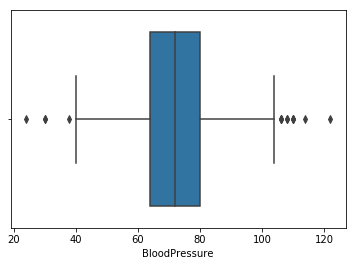

In [42]:
#bloodpressure analysis
sns.boxplot(x=pima_df["BloodPressure"])

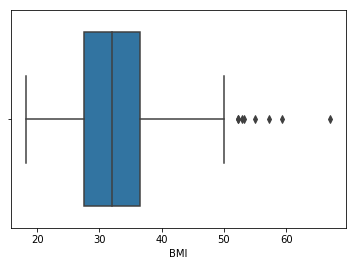

In [45]:
#BMI 
sns.boxplot(x=pima_df["BMI"])

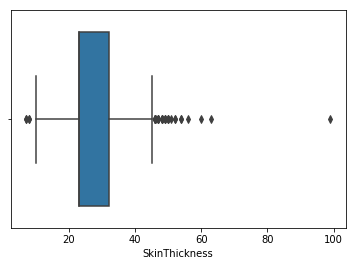

In [46]:
#skinthickness
sns.boxplot(x=pima_df["SkinThickness"])

# Univariate analysis check shows there are a lot of outliers.

In [82]:
#Removal of outliers

Q1 = pima_df.quantile(0.25)
Q3 = pima_df.quantile(0.75)
IQR = Q3 - Q1
pima_df = pima_df [~((pima_df < (Q1 - 1.5 * IQR)) | (pima_df > (Q3 + 1.5 * IQR))).any(axis=1)]
pima_df.shape

(636, 9)

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

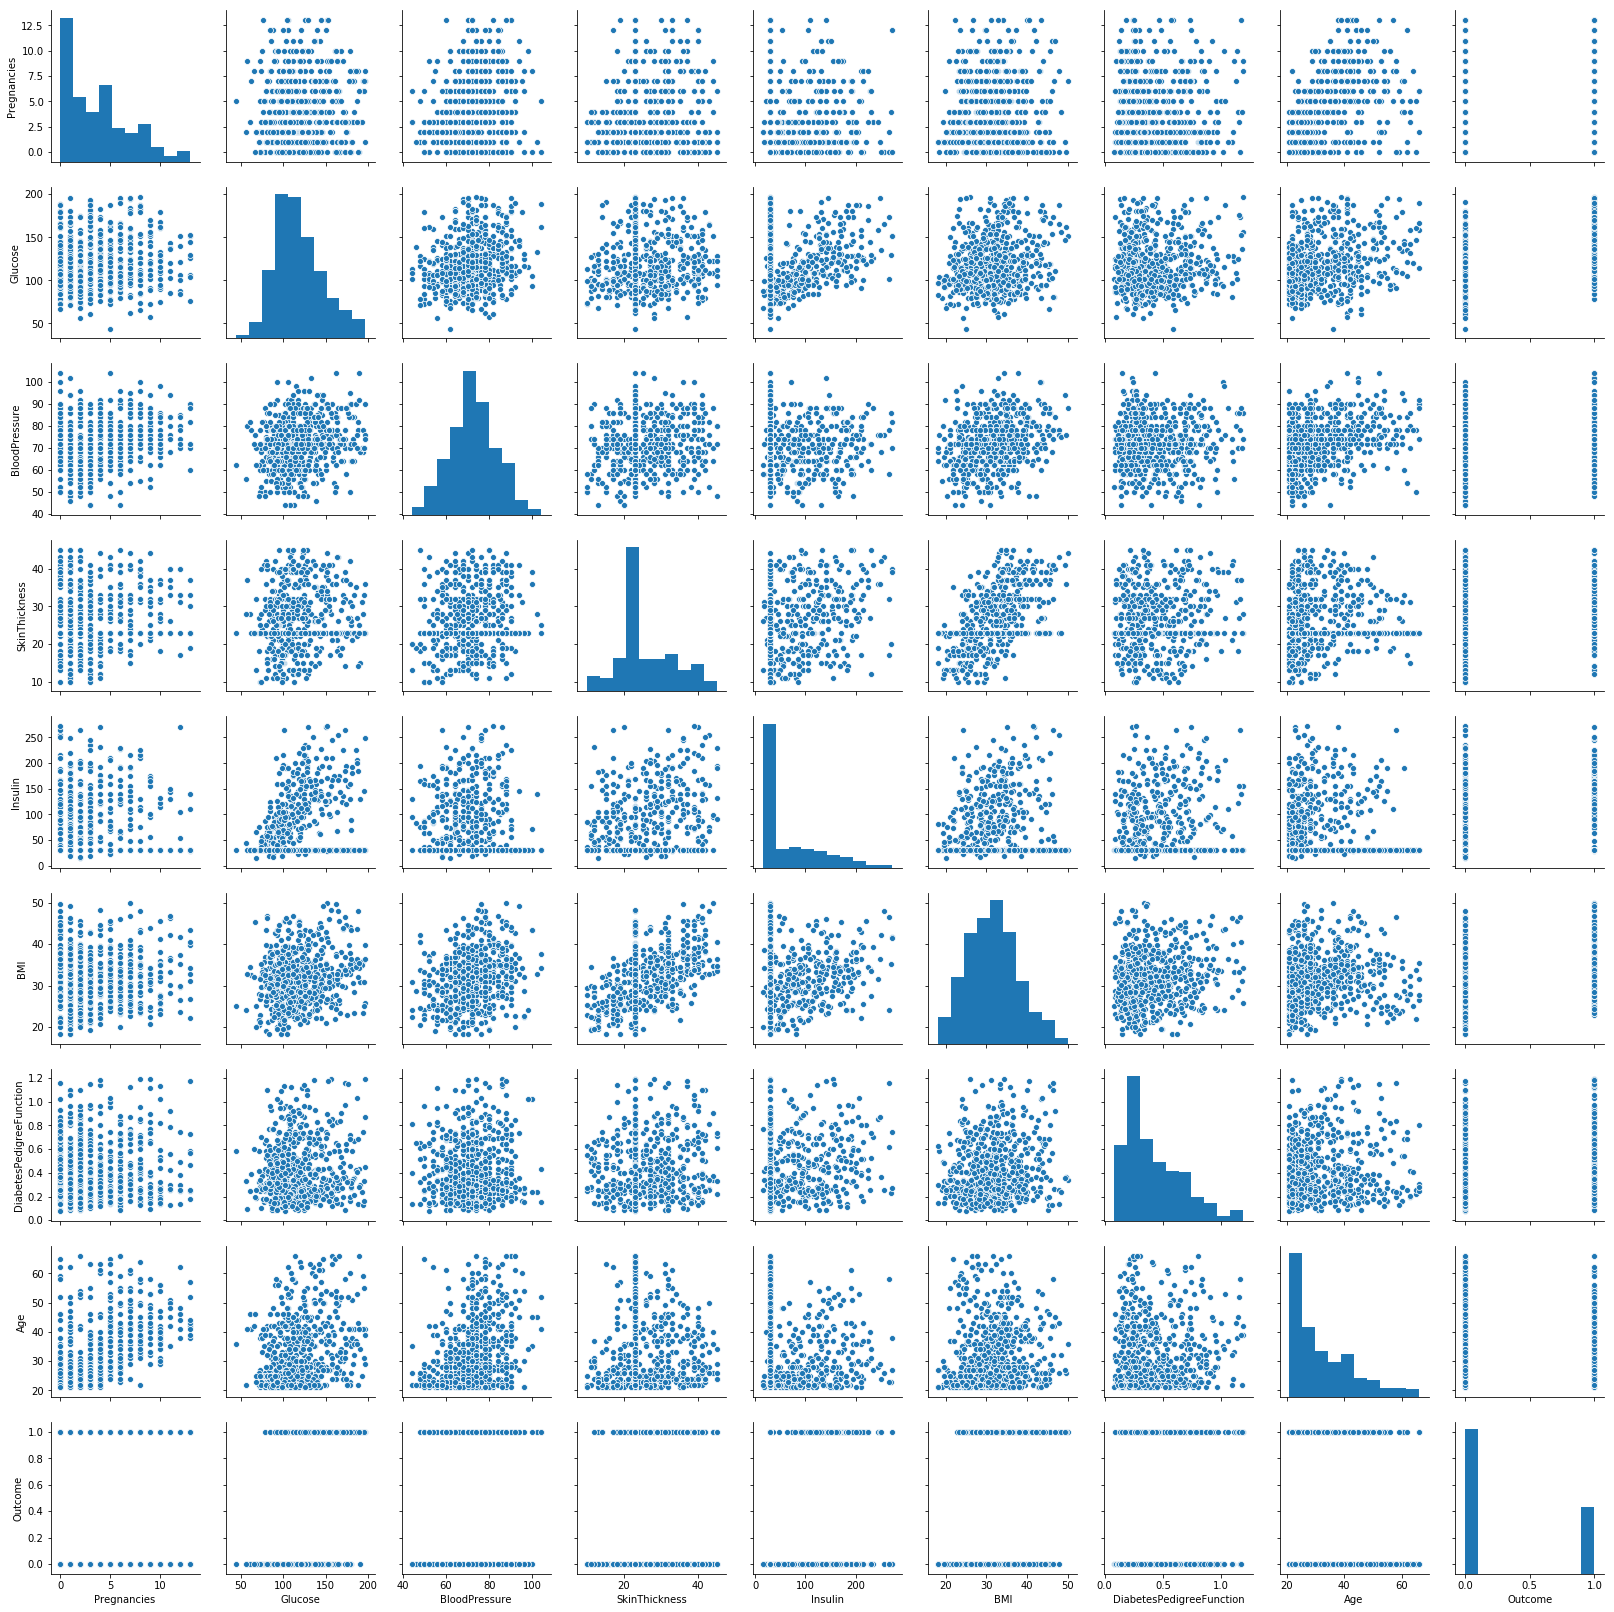

In [60]:
sns.pairplot(pima_df, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

In [61]:
pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136150,0.205757,0.107373,-0.101168,0.055901,0.017663,0.543479,0.214323
Glucose,0.136150,1.000000,0.240464,0.091046,0.237415,0.194072,0.089453,0.295758,0.490270
BloodPressure,0.205757,0.240464,1.000000,0.133846,-0.050079,0.266487,0.028007,0.352672,0.177565
SkinThickness,0.107373,0.091046,0.133846,1.000000,0.253677,0.521505,0.125144,0.066527,0.153809
Insulin,-0.101168,0.237415,-0.050079,0.253677,1.000000,0.165635,0.219786,-0.079830,0.067438
BMI,0.055901,0.194072,0.266487,0.521505,0.165635,1.000000,0.158388,0.076238,0.287197
DiabetesPedigreeFunction,0.017663,0.089453,0.028007,0.125144,0.219786,0.158388,1.000000,0.045160,0.190737
Age,0.543479,0.295758,0.352672,0.066527,-0.079830,0.076238,0.045160,1.000000,0.249491
Outcome,0.214323,0.490270,0.177565,0.153809,0.067438,0.287197,0.190737,0.249491,1.000000


# We observe that BMI has linear relationships with skin thickness & blood pressure in the decreasing order respectively. Higher BMI values are often associated with higher fat and high BP, since we have a prediction problem, we are choosing a decision tree and not a logistic regression.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).


In [17]:
X = pima_df.drop(columns='Outcome')
Y = pima_df[['Outcome']]

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [83]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Spliting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
  
#Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_impurity_decrease=0.01)
 
# Train Decision Tree Classifer
clf_entropy = clf_entropy.fit(X_train,y_train)

In [84]:
Y_predict_test = clf_entropy.predict(X_test)
Y_predict_train = clf_entropy.predict(X_train)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(Y_test, Y_predict_test))
print("Train accuracy is", accuracy_score(Y_train,Y_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y_predict_test))

[[146   0]
 [ 72  13]]
Train accuracy is 0.6741154562383612
Test accuracy is 0.6883116883116883


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,max_depth=6,max_features = 5, random_state=1)
rfcl.fit(X_train, Y_train)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [87]:
Y2_predict_test = rfcl.predict(X_test)
Y2_predict_train = rfcl.predict(X_train)
print("Train accuracy is", accuracy_score(Y_train,Y2_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y2_predict_test))

Train accuracy is 0.9031657355679702
Test accuracy is 0.7878787878787878


In [88]:
Y3_pred_test = rfcl.predict_proba(X_test)[:,1]
Y3_pred_train = rfcl.predict_proba(X_train)[:,1]
from sklearn.metrics import roc_auc_score
print("train auc is",roc_auc_score(Y_train,Y3_pred_train))

train auc is 0.9708561020036429


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [89]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=clf_entropy, n_estimators=500)
bgcl.fit(X_train, Y_train)

Y4_predict_test = bgcl.predict(X_test)
Y4_predict_train = bgcl.predict(X_train)

print("Train accuracy is", accuracy_score(Y_train,Y4_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y4_predict_test))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy is 0.8435754189944135
Test accuracy is 0.7922077922077922
